In [71]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Creative\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
df = pd.read_csv('Data.csv')

In [15]:
df.head()

,Client ID,Product,Revenue,Premium,Time,Industry,Office_Category
0,123234.0,Surety,7310.75,41369.25,66.0,Construction,NaN
1,13945.0,FSG,112.00,746.75,3.0,Business and Personal Services,NaN
2,23769.0,Surety,4152.00,15561.50,38.0,Construction,NaN
3,26452.0,Surety,2455.75,8186.25,21.0,Construction,NaN
4,11655.0,FSG,3187.50,21250.00,3.0,Construction,NaN


In [26]:
X = df['Premium']
y = df['Revenue']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [47]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

C:\Users\Creative\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\Creative\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [48]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [54]:
y_test.reset_index(drop=True, inplace=True)

In [66]:
results = pd.DataFrame(pred_test, columns=['Predicted'])

In [67]:
results['Actual'] = y_test

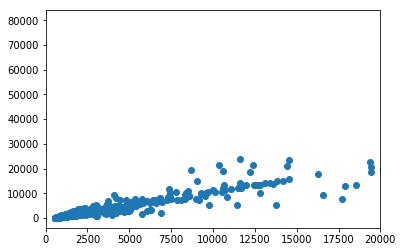

In [78]:
ax = plt.axes()
ax.set_xlim([0, 20000])
ax.scatter(results['Predicted'], results['Actual'])

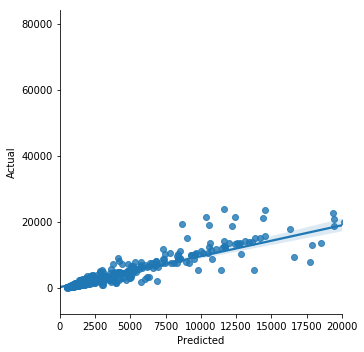

In [82]:
lm = sns.lmplot('Predicted', 'Actual', data=results)
lm.set(xlim=(0, 20000))

In [ ]:
plt.scatter(df['Revenue'], lm.predict(X))
plt.xlabel('Prices: $y')

In [ ]:
# errors in the data  Residual plots

In [ ]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot Traing (blue)  and Test (green) color')
plt.ylabel('Residual')